## Analysis of PCAWG clinical data

### AOCS

In [239]:
#Load data
setwd("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Analysis/Clinical_associations/")
#setwd("~/Desktop/BRCA1_BRCA2_SVs_paper/Analysis/Clinical_associations/")
pcawg_clinical<-read.table("AOCS_clinical_neoantigen_info.csv",header=T,sep=",")

In [240]:
pcawg_clinical_withdat<-pcawg_clinical[pcawg_clinical$specimen_type_description=="primary tumour",
                                       c("project_code","donor","icgc_donor_id","donor_age_at_diagnosis",
                                         "donor_tumour_stage_at_diagnosis","treatment","olaparib","donor_vital_status",
                                         "donor_survival_time","donor_interval_of_last_followup",
                                         "disease_status_last_followup","donor_relapse_interval")]

** Format survival endpoints**

In [241]:
pcawg_clinical_withdat[pcawg_clinical_withdat$donor_vital_status=="alive","os_event"]<-0
pcawg_clinical_withdat[pcawg_clinical_withdat$donor_vital_status=="deceased","os_event"]<-1

pcawg_clinical_withdat[pcawg_clinical_withdat$disease_status_last_followup=="complete remission","pfs_event"]<-0
pcawg_clinical_withdat[pcawg_clinical_withdat$disease_status_last_followup=="relapse","pfs_event"]<-1
pcawg_clinical_withdat[pcawg_clinical_withdat$disease_status_last_followup=="progression","pfs_event"]<-1

pcawg_clinical_withdat[pcawg_clinical_withdat$disease_status_last_followup=="progression","donor_relapse_interval"]<-0


**Format Neo-adjuvant chemo status**

In [242]:
pcawg_clinical_withdat[pcawg_clinical_withdat$treatment=="chemo treated","neoadjuvant"]<-1
pcawg_clinical_withdat[pcawg_clinical_withdat$treatment=="treatment naive","neoadjuvant"]<-0

**Format tumour stage at diagnosis**

In [243]:
pcawg_clinical_withdat[pcawg_clinical_withdat$donor_tumour_stage_at_diagnosis=="III","stage"]<-3
pcawg_clinical_withdat[pcawg_clinical_withdat$donor_tumour_stage_at_diagnosis=="IV","stage"]<-4

**Merge ids**

In [244]:
pcawg_clinical_withdat$Sample<-gsub("-","_",as.character(pcawg_clinical_withdat$donor))
rownames(pcawg_clinical_withdat)<-as.character(pcawg_clinical_withdat$Sample)

In [245]:
ids<-read.table("../../../params/AOCS_usable_ids.txt",sep="\t")
ids<-as.character(ids[,1])

In [246]:
pcawg_clinical_withdat_aocs<-pcawg_clinical_withdat[ids,]

In [247]:
pcawg_clinical_withdat_aocs<-pcawg_clinical_withdat_aocs[,c("Sample","donor_age_at_diagnosis","stage","neoadjuvant","donor_survival_time","os_event","donor_relapse_interval","pfs_event")]
pcawg_clinical_withdat_aocs[1,]
pcawg_clinical_withdat_aocs$cohort<-"AOCS"

,Sample,donor_age_at_diagnosis,stage,neoadjuvant,donor_survival_time,os_event,donor_relapse_interval,pfs_event
,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
AOCS_001,AOCS_001,54,3,0,477,1,21,1


### TCGA

In [248]:
setwd("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Analysis/Clinical_associations/Clinical_analysis_wrt_HRD_PCAWG")
pcawg_clinical<-read.table("pcawg_ovca_clinical_230819.txt",header=T,sep="\t")

pcawg_clinical_withdat_tcga<-pcawg_clinical[pcawg_clinical$project_code=="OV-US",c("project_code","icgc_donor_id","donor_age_at_diagnosis","donor_vital_status","donor_survival_time","donor_interval_of_last_followup")]

In [249]:
pcawg_clinical_withdat_tcga$surv_time<-pcawg_clinical_withdat_tcga$donor_survival_time
pcawg_clinical_withdat_tcga[which(is.na(pcawg_clinical_withdat_tcga$donor_survival_time)),"surv_time"]<-pcawg_clinical_withdat_tcga[which(is.na(pcawg_clinical_withdat_tcga$donor_survival_time)),"donor_interval_of_last_followup"]

In [250]:
pcawg_clinical_withdat_tcga[pcawg_clinical_withdat_tcga$donor_vital_status=="alive","os_event"]<-0
pcawg_clinical_withdat_tcga[pcawg_clinical_withdat_tcga$donor_vital_status=="deceased","os_event"]<-1

In [251]:
pcawg_clinical_withdat_tcga$Sample<-pcawg_clinical_withdat_tcga$icgc_donor_id

In [252]:
tcga_stage<-read.table("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Analysis/Clinical_associations/Clinical_analysis_wrt_HRD_PCAWG/tcga_stage_age.txt",header=T,sep="\t")
colnames(tcga_stage)[1]<-"Sample"
add_tcga<-merge(pcawg_clinical_withdat_tcga,tcga_stage,by="Sample",all.x=T)

In [253]:
add_tcga$neoadjuvant<-NA
add_tcga$donor_relapse_interval<-NA
add_tcga$pfs_event<-NA
pcawg_clinical_withdat_tcga<-add_tcga[,c("Sample","donor_age_at_diagnosis","stage","neoadjuvant","donor_survival_time",
                                        "os_event","donor_relapse_interval","pfs_event")]
pcawg_clinical_withdat_tcga$cohort<-"TCGA"
pcawg_clinical_withdat_tcga<-pcawg_clinical_withdat_tcga[pcawg_clinical_withdat_tcga$Sample!="DO30650",]


### SHGSOC

In [254]:
shgsoc_clinical<-read.csv("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Manuscript/Intermediate_data/SHGSOC.clinical.EdGlasgowDundee.minimal.csv")

In [255]:
shgsoc_clinical$Sample<-as.character(shgsoc_clinical$New_Patient_id)
shgsoc_clinical$cohort<-"SHGSOC"
shgsoc_clinical$donor_age_at_diagnosis<-shgsoc_clinical$AgeAtDiagnosis

shgsoc_clinical$stage<-NA
shgsoc_clinical[which(shgsoc_clinical$FIGO.stage=="III"),"stage"]<-3
shgsoc_clinical[which(shgsoc_clinical$FIGO.stage=="IV"),"stage"]<-4
shgsoc_clinical[which(shgsoc_clinical$FIGO.stage=="II"),"stage"]<-2
shgsoc_clinical[which(shgsoc_clinical$FIGO.stage=="I"),"stage"]<-1

shgsoc_clinical$donor_survival_time<-shgsoc_clinical$OS.days
shgsoc_clinical$os_event<-NA
shgsoc_clinical[shgsoc_clinical$OS.status=="deceased","os_event"]<-1
shgsoc_clinical[shgsoc_clinical$OS.status=="alive","os_event"]<-0

shgsoc_clinical$donor_relapse_interval<-shgsoc_clinical$radioPFS
shgsoc_clinical$pfs_event<-NA
shgsoc_clinical[which(shgsoc_clinical$radioPFS.status=="progressed"),"pfs_event"]<-1
shgsoc_clinical[which(shgsoc_clinical$radioPFS.status=="stable"),"pfs_event"]<-0

shgsoc_clinical<-shgsoc_clinical[,c("Sample","donor_age_at_diagnosis","stage","donor_survival_time","os_event","donor_relapse_interval","pfs_event","cohort")]
shgsoc_clinical[1:5,]

Sample,donor_age_at_diagnosis,stage,donor_survival_time,os_event,donor_relapse_interval,pfs_event,cohort
<chr>,<int>,<dbl>,<fct>,<dbl>,<int>,<dbl>,<chr>
SHGSOC017,62,3,1609,1,NA,NA,SHGSOC
SHGSOC009,56,3,2142,1,NA,NA,SHGSOC
SHGSOC014,70,3,5637,1,4347,1,SHGSOC
SHGSOC015,65,3,2846,1,1657,1,SHGSOC
SHGSOC016,47,2,5834,1,3374,1,SHGSOC


In [256]:
#Edinburgh
edinburgh_clin<-read.csv("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Analysis/Clinical_associations/Clinical_analysis_wrt_HRD_PCAWG/Edinburgh_cohortA_ailith_clinical.csv")

edinburgh_clin$Sample<-as.character(edinburgh_clin$ailiths_ID)

edinburgh_clin$neoadjuvant<-NA
edinburgh_clin[edinburgh_clin$Neoadjuvant=="Yes","neoadjuvant"]<-1
edinburgh_clin[edinburgh_clin$Neoadjuvant=="No","neoadjuvant"]<-0

edinburgh_clin<-edinburgh_clin[,c("Sample","neoadjuvant")]



#Dundee
dundee_clin<-read.csv("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Analysis/Clinical_associations/Clinical_analysis_wrt_HRD_PCAWG/Dundee_cohortA_ailith_clinical.csv")

dundee_clin$newneoadjuvant<-NA
dundee_clin[dundee_clin$neoadjuvant=="Yes","newneoadjuvant"]<-1
dundee_clin[dundee_clin$neoadjuvant=="no","newneoadjuvant"]<-0
dundee_clin$neoadjuvant<-dundee_clin$newneoadjuvant

dundee_clin<-dundee_clin[,c("Sample","neoadjuvant")]



#Glasgow

glasgow_clin<-read.csv("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Analysis/Clinical_associations/Clinical_analysis_wrt_HRD_PCAWG/Glasgow_cohortA_ailith_clinical.csv")

glasgow_clin$Sample<-as.character(glasgow_clin$Sample.ID)

glasgow_clin$newneoadjuvant<-NA
glasgow_clin[glasgow_clin$Neoadvjuvent.Chemo=="Yes","newneoadjuvant"]<-1
glasgow_clin[glasgow_clin$Neoadvjuvent.Chemo=="no","newneoadjuvant"]<-0
glasgow_clin$neoadjuvant<-glasgow_clin$newneoadjuvant

glasgow_clin<-glasgow_clin[,c("Sample","neoadjuvant")]



all_neo<-rbind(edinburgh_clin,dundee_clin,glasgow_clin)

In [257]:
#Add neoadjuvant
shgsoc_clin_withneo<-merge(shgsoc_clinical,all_neo,by="Sample")
shgsoc_clin_withneo<-shgsoc_clin_withneo[,c("Sample","donor_age_at_diagnosis","stage","neoadjuvant","donor_survival_time","os_event","donor_relapse_interval","pfs_event","cohort")]

dim(shgsoc_clin_withneo)

[1] 81  9

### Combine datasets

In [258]:
all_clin_dat<-rbind(pcawg_clinical_withdat_aocs,pcawg_clinical_withdat_tcga,shgsoc_clin_withneo)

In [259]:
dim(pcawg_clinical_withdat_aocs)
dim(pcawg_clinical_withdat_tcga)
dim(edinburgh_clin)
dim(dundee_clin)
dim(glasgow_clin)
dim(all_clin_dat)

[1] 80  9

[1] 44  9

[1] 30  2

[1] 9 2

[1] 42  2

[1] 205   9

In [260]:

#write.table(all_clin_dat, 
#file="/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Manuscript/Supplementary_tables/HGSOC_clinical_data.txt",sep="\t",row.names=F,quote=F)

### Merge with sample info

In [307]:
sampleInfo<-read.table("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Tables/SampleInformation.txt",sep="\t",header=T,stringsAsFactors=F)
rownames(sampleInfo)<-sampleInfo[,1]

sampleInfo$HRDeficient<-ifelse(sampleInfo$HRDetect>0.7,1,0)


In [308]:
i<-intersect(sampleInfo$Sample, all_clin_dat$Sample)
length(i)

[1] 205

In [309]:
clinical_withdat_sampleinfo<-merge(all_clin_dat,sampleInfo,by="Sample",all.x=T)

In [310]:
dim(clinical_withdat_sampleinfo)
table(clinical_withdat_sampleinfo$Cohort)

[1] 205  45


AO DO SH 
80 44 81 

### Overall survival

#### Modelling

In [311]:
library(survival)

In [312]:
clinical_withdat_sampleinfo_keyvars<-clinical_withdat_sampleinfo[,c("Sample","donor_survival_time","os_event","HRDetect")]
clinical_withdat_sampleinfo_keyvars<-clinical_withdat_sampleinfo_keyvars[is.na(clinical_withdat_sampleinfo_keyvars$HRDetect)==FALSE,]
dim(clinical_withdat_sampleinfo_keyvars)
#write.table(clinical_withdat_sampleinfo_keyvars, 
 #           file="/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Tables/Tables_forpaper/Final_Tables/SuppTable_SurvivalInformation.txt",sep="\t",row.names=F,quote=F)

[1] 205   4

In [313]:
clinical_withdat_sampleinfo$donor_survival_time<-as.numeric(clinical_withdat_sampleinfo$donor_survival_time)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

In [314]:
mod<-coxph(Surv(clinical_withdat_sampleinfo$donor_survival_time,clinical_withdat_sampleinfo$os_event)~clinical_withdat_sampleinfo$HRDetect+strata(as.factor(clinical_withdat_sampleinfo$Cohort)))
mod2<-coxph(Surv(clinical_withdat_sampleinfo$donor_survival_time,clinical_withdat_sampleinfo$os_event)~as.factor(clinical_withdat_sampleinfo$HRDeficient)+strata(as.factor(clinical_withdat_sampleinfo$Cohort)))
mod_age<-coxph(Surv(clinical_withdat_sampleinfo$donor_survival_time,clinical_withdat_sampleinfo$os_event)~clinical_withdat_sampleinfo$HRDetect+clinical_withdat_sampleinfo$donor_age_at_diagnosis+strata(as.factor(clinical_withdat_sampleinfo$Cohort)))
mod_age_stage<-coxph(Surv(clinical_withdat_sampleinfo$donor_survival_time,clinical_withdat_sampleinfo$os_event)~clinical_withdat_sampleinfo$HRDetect+clinical_withdat_sampleinfo$donor_age_at_diagnosis+clinical_withdat_sampleinfo$stage+strata(as.factor(clinical_withdat_sampleinfo$Cohort)))

In [315]:
summary(mod)
#summary(mod2)
#summary(mod_age)
summary(mod_age_stage)

Call:
coxph(formula = Surv(clinical_withdat_sampleinfo$donor_survival_time, 
    clinical_withdat_sampleinfo$os_event) ~ clinical_withdat_sampleinfo$HRDetect + 
    strata(as.factor(clinical_withdat_sampleinfo$Cohort)))

  n= 190, number of events= 144 
   (15 observations deleted due to missingness)

                                        coef exp(coef) se(coef)      z Pr(>|z|)
clinical_withdat_sampleinfo$HRDetect -1.0274    0.3579   0.2085 -4.927 8.36e-07
                                        
clinical_withdat_sampleinfo$HRDetect ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                                     exp(coef) exp(-coef) lower .95 upper .95
clinical_withdat_sampleinfo$HRDetect    0.3579      2.794    0.2378    0.5386

Concordance= 0.634  (se = 0.026 )
Likelihood ratio test= 23.88  on 1 df,   p=1e-06
Wald test            = 24.27  on 1 df,   p=8e-07
Score (logrank) test = 25.27  on 1 df,   p=5e-07


Call:
coxph(formula = Surv(clinical_withdat_sampleinfo$donor_survival_time, 
    clinical_withdat_sampleinfo$os_event) ~ clinical_withdat_sampleinfo$HRDetect + 
    clinical_withdat_sampleinfo$donor_age_at_diagnosis + clinical_withdat_sampleinfo$stage + 
    strata(as.factor(clinical_withdat_sampleinfo$Cohort)))

  n= 189, number of events= 144 
   (16 observations deleted due to missingness)

                                                        coef exp(coef)
clinical_withdat_sampleinfo$HRDetect               -1.017616  0.361455
clinical_withdat_sampleinfo$donor_age_at_diagnosis  0.022563  1.022820
clinical_withdat_sampleinfo$stage                   0.289497  1.335755
                                                    se(coef)      z Pr(>|z|)
clinical_withdat_sampleinfo$HRDetect                0.212042 -4.799 1.59e-06
clinical_withdat_sampleinfo$donor_age_at_diagnosis  0.009052  2.493   0.0127
clinical_withdat_sampleinfo$stage                   0.184443  1.570   0.1165
           

**Check assumptions**

In [316]:
test.ph<-cox.zph(mod_age_stage)

                                                       rho chisq     p
clinical_withdat_sampleinfo$HRDetect                0.0992 1.324 0.250
clinical_withdat_sampleinfo$donor_age_at_diagnosis -0.0358 0.196 0.658
clinical_withdat_sampleinfo$stage                  -0.0471 0.262 0.609
GLOBAL                                                  NA 1.706 0.636

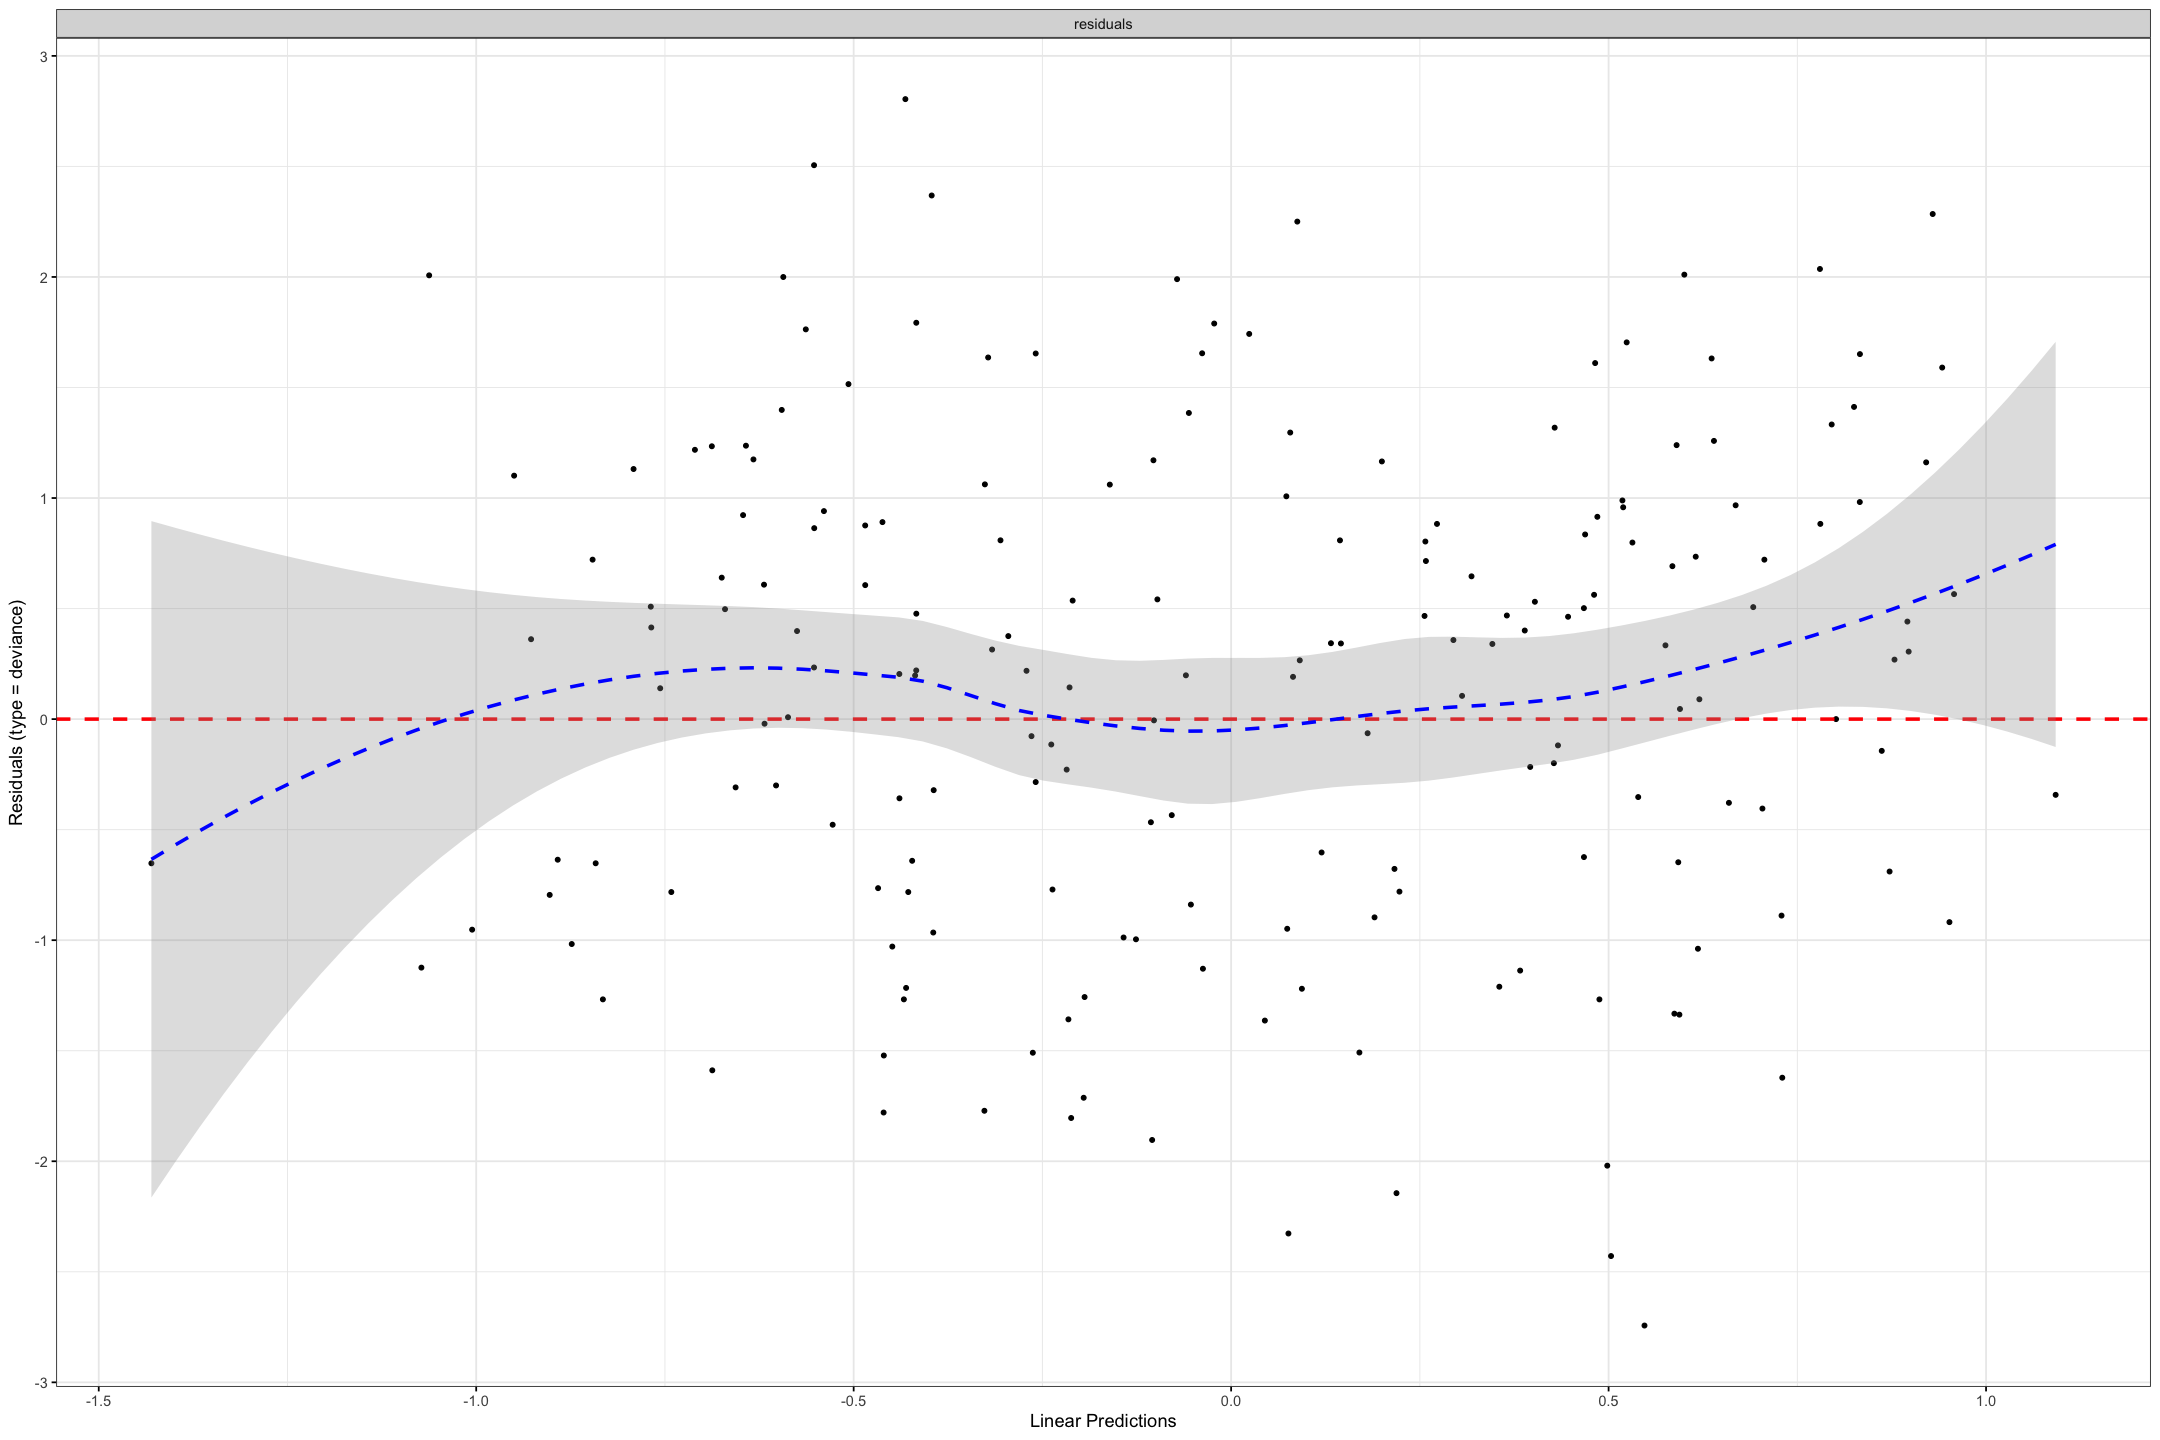

In [317]:
library(survminer)
test.ph
#ggcoxzph(test.ph)
ggcoxdiagnostics(mod_age_stage, type = "deviance", linear.predictions = TRUE)

#### Plotting

In [318]:
table(clinical_withdat_sampleinfo$HRDeficient)


  0   1 
 99 106 

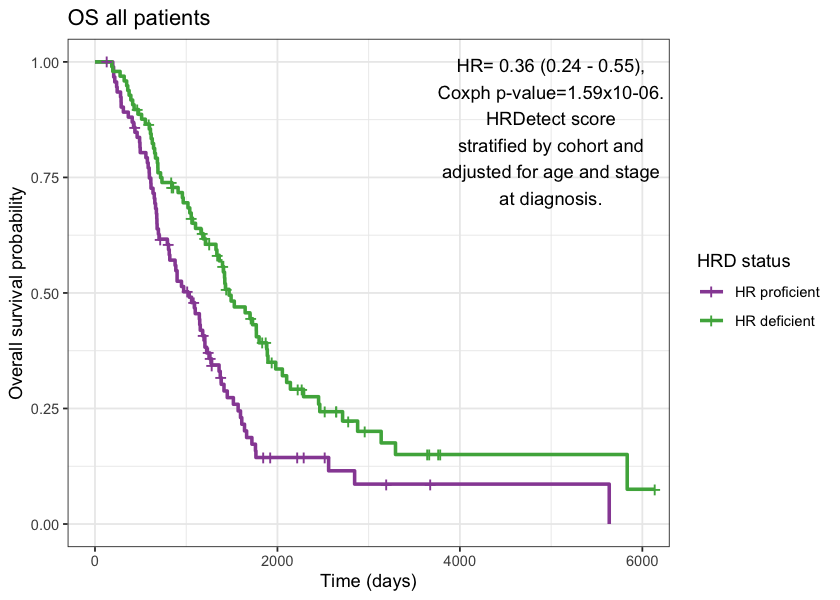

In [348]:
fit <- survfit(Surv(donor_survival_time,os_event) ~ HRDeficient,data=clinical_withdat_sampleinfo)
fit1 <- survfit(Surv(donor_survival_time,os_event) ~ HRDeficient+Cohort,data=clinical_withdat_sampleinfo)
options(repr.plot.height=5,repr.plot.width=7)
gg<-ggsurvplot(fit,data=clinical_withdat_sampleinfo)
gg1<-ggsurvplot(fit1,data=clinical_withdat_sampleinfo)



options(repr.plot.height=5,repr.plot.width=7)
#png("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Analysis/Clinical_associations/Clinical_analysis_wrt_HRD_PCAWG/Effect_of_HRDstatus_onsurvival_pcawg.png",width=7,height=5,res=300,unit="in")
gg$plot + theme_bw()+
annotate("text",x=5000,y=0.85,label="HR= 0.36 (0.24 - 0.55),\nCoxph p-value=1.59x10-06.\nHRDetect score\nstratified by cohort and\nadjusted for age and stage\nat diagnosis.")+
xlab("Time (days)")+scale_colour_manual(name="HRD status",values=c("#984EA3","#4DAF4A"),
                                        labels=c("HR proficient","HR deficient"))+
ylab("Overall survival probability")+
ggtitle("OS all patients")
#dev.off()


In [349]:
censored<-clinical_withdat_sampleinfo
censored$event<-censored$os_event
censored$surv_time<-censored$donor_survival_time
censored[which(censored$donor_survival_time>2557),"event"]<-0
censored[which(censored$donor_survival_time>2557),"surv_time"]<-2557
fit_censored <- survfit(Surv(surv_time,event) ~ HRDeficient,data=censored)

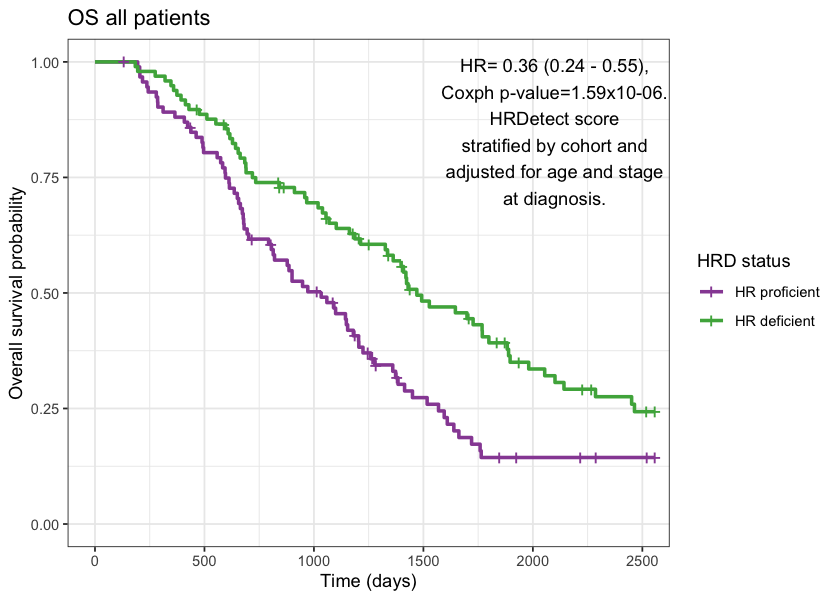

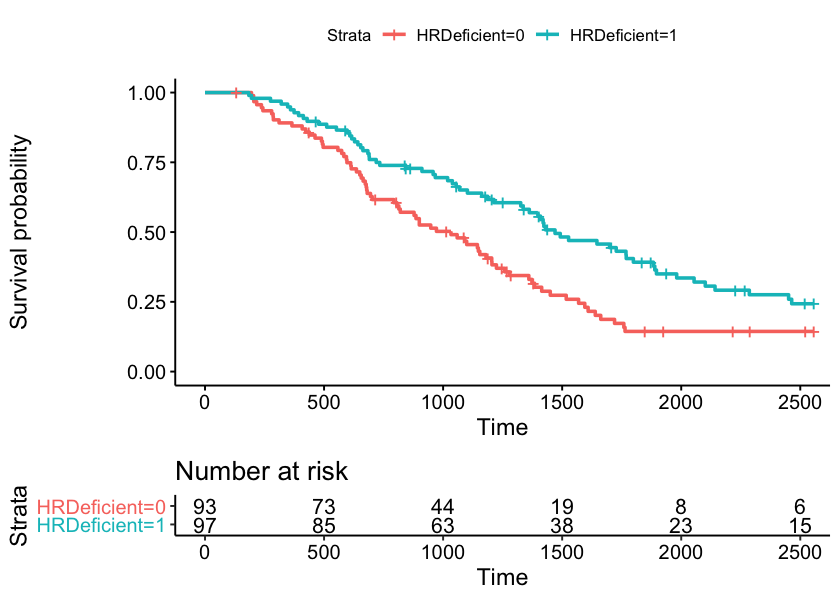

In [350]:
options(repr.plot.height=5,repr.plot.width=7)
gg1<-ggsurvplot(fit_censored,data=censored,risk.table=T)

options(repr.plot.height=5,repr.plot.width=7)
#png("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Analysis/Clinical_associations/Clinical_analysis_wrt_HRD_PCAWG/Effect_of_HRDstatus_onsurvival_pcawg_censored7yrs.png",width=7,height=5,res=300,unit="in")
gg1_km<-gg1$plot + theme_bw()+
annotate("text",x=2100,y=0.85,label="HR= 0.36 (0.24 - 0.55),\nCoxph p-value=1.59x10-06.\nHRDetect score\nstratified by cohort and\nadjusted for age and stage\nat diagnosis.")+
xlab("Time (days)")+scale_colour_manual(name="HRD status",values=c("#984EA3","#4DAF4A"),
                                        labels=c("HR proficient","HR deficient"))+
ylab("Overall survival probability")+
ggtitle("OS all patients")
gg1_km
#dev.off()
print(gg1,surv.plot.height=0)

### Progression-free survival

#### Modelling

In [383]:
clinical_withdat_sampleinfo[1:3,]

Sample,donor_age_at_diagnosis,stage,neoadjuvant,donor_survival_time,os_event,donor_relapse_interval,pfs_event,cohort,Cohort,⋯,Mutational_load,SV_load,CNV_load,DESeq2_aocs_PC1,DESeq2_tcga_PC1,DESeq2_shgsoc_PC1,ReSig_3,ReSig_5,HRDetect,HRDeficient
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,⋯,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AOCS_001,54,3,0,477,1,21,1,AOCS,AO,⋯,7523,301,221,-13.856384,10.9535817,2.463079,71.1685,0.00000,0.99948982,1
AOCS_004,54,3,0,184,1,0,1,AOCS,AO,⋯,8254,173,262,-9.889731,10.9141965,4.009913,0.0000,69.26988,0.92542907,1
AOCS_005,52,3,0,972,1,167,1,AOCS,AO,⋯,6950,595,156,0.826516,0.5175141,4.057154,0.0000,0.00000,0.03693727,0


In [384]:
mod<-coxph(Surv(clinical_withdat_sampleinfo$donor_relapse_interval,clinical_withdat_sampleinfo$pfs_event)~clinical_withdat_sampleinfo$HRDetect+strata(as.factor(clinical_withdat_sampleinfo$cohort)))
mod2<-coxph(Surv(clinical_withdat_sampleinfo$donor_relapse_interval,clinical_withdat_sampleinfo$pfs_event)~as.factor(clinical_withdat_sampleinfo$HRDeficient)+strata(as.factor(clinical_withdat_sampleinfo$cohort)))
mod_age<-coxph(Surv(clinical_withdat_sampleinfo$donor_relapse_interval,clinical_withdat_sampleinfo$pfs_event)~clinical_withdat_sampleinfo$HRDetect+clinical_withdat_sampleinfo$donor_age_at_diagnosis+strata(as.factor(clinical_withdat_sampleinfo$cohort)))
mod_age_stage<-coxph(Surv(clinical_withdat_sampleinfo$donor_relapse_interval,clinical_withdat_sampleinfo$pfs_event)~clinical_withdat_sampleinfo$HRDetect+clinical_withdat_sampleinfo$donor_age_at_diagnosis+clinical_withdat_sampleinfo$stage+strata(as.factor(clinical_withdat_sampleinfo$cohort)))

In [385]:
summary(mod)
summary(mod2)
#summary(mod_age)
summary(mod_age_stage)

Call:
coxph(formula = Surv(clinical_withdat_sampleinfo$donor_relapse_interval, 
    clinical_withdat_sampleinfo$pfs_event) ~ clinical_withdat_sampleinfo$HRDetect + 
    strata(as.factor(clinical_withdat_sampleinfo$cohort)))

  n= 151, number of events= 129 
   (54 observations deleted due to missingness)

                                        coef exp(coef) se(coef)     z Pr(>|z|)
clinical_withdat_sampleinfo$HRDetect -0.5941    0.5521   0.2209 -2.69  0.00716
                                       
clinical_withdat_sampleinfo$HRDetect **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                                     exp(coef) exp(-coef) lower .95 upper .95
clinical_withdat_sampleinfo$HRDetect    0.5521      1.811    0.3581    0.8512

Concordance= 0.609  (se = 0.028 )
Likelihood ratio test= 7.04  on 1 df,   p=0.008
Wald test            = 7.23  on 1 df,   p=0.007
Score (logrank) test = 7.33  on 1 df,   p=0.007


Call:
coxph(formula = Surv(clinical_withdat_sampleinfo$donor_relapse_interval, 
    clinical_withdat_sampleinfo$pfs_event) ~ as.factor(clinical_withdat_sampleinfo$HRDeficient) + 
    strata(as.factor(clinical_withdat_sampleinfo$cohort)))

  n= 151, number of events= 129 
   (54 observations deleted due to missingness)

                                                       coef exp(coef) se(coef)
as.factor(clinical_withdat_sampleinfo$HRDeficient)1 -0.4246    0.6540   0.1918
                                                         z Pr(>|z|)  
as.factor(clinical_withdat_sampleinfo$HRDeficient)1 -2.214   0.0268 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                                                    exp(coef) exp(-coef)
as.factor(clinical_withdat_sampleinfo$HRDeficient)1     0.654      1.529
                                                    lower .95 upper .95
as.factor(clinical_withdat_sampleinfo$HRDeficient)1    0.4491    0.9525

Concordance= 0.561  (s

Call:
coxph(formula = Surv(clinical_withdat_sampleinfo$donor_relapse_interval, 
    clinical_withdat_sampleinfo$pfs_event) ~ clinical_withdat_sampleinfo$HRDetect + 
    clinical_withdat_sampleinfo$donor_age_at_diagnosis + clinical_withdat_sampleinfo$stage + 
    strata(as.factor(clinical_withdat_sampleinfo$cohort)))

  n= 150, number of events= 129 
   (55 observations deleted due to missingness)

                                                        coef exp(coef)
clinical_withdat_sampleinfo$HRDetect               -0.607017  0.544974
clinical_withdat_sampleinfo$donor_age_at_diagnosis  0.008947  1.008987
clinical_withdat_sampleinfo$stage                   0.298754  1.348178
                                                    se(coef)      z Pr(>|z|)   
clinical_withdat_sampleinfo$HRDetect                0.225468 -2.692   0.0071 **
clinical_withdat_sampleinfo$donor_age_at_diagnosis  0.009257  0.967   0.3338   
clinical_withdat_sampleinfo$stage                   0.171464  1.742   0.081

**Check assumptions**

                                                       rho chisq      p
clinical_withdat_sampleinfo$HRDetect                0.1489 2.984 0.0841
clinical_withdat_sampleinfo$donor_age_at_diagnosis -0.1249 2.039 0.1534
clinical_withdat_sampleinfo$stage                   0.0792 0.761 0.3829
GLOBAL                                                  NA 7.313 0.0626

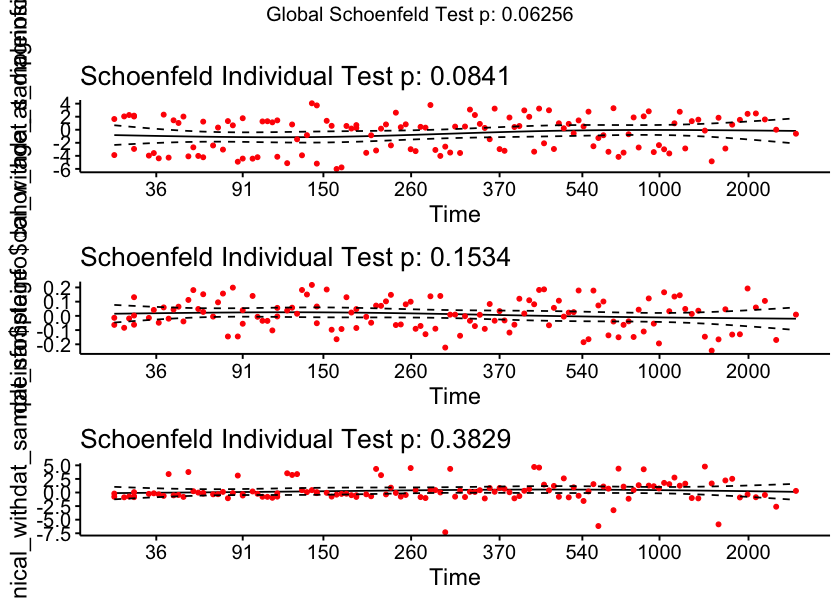

In [386]:
test.ph<-cox.zph(mod_age_stage)
test.ph
ggcoxzph(test.ph)

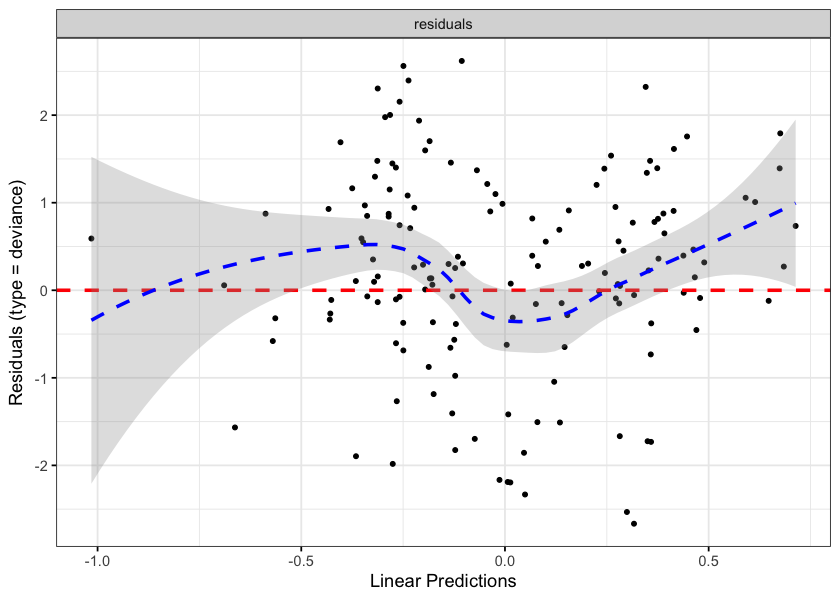

In [387]:
ggcoxdiagnostics(mod_age_stage, type = "deviance", linear.predictions = TRUE)

#### Plotting

In [388]:
censored<-clinical_withdat_sampleinfo
censored$event<-censored$pfs_event
censored$surv_time<-censored$donor_relapse_interval
censored[which(censored$donor_relapse_interval>2557),"event"]<-0
censored[which(censored$donor_relapse_interval>2557),"surv_time"]<-2557
fit_censored <- survfit(Surv(surv_time,event) ~ HRDeficient,data=censored)

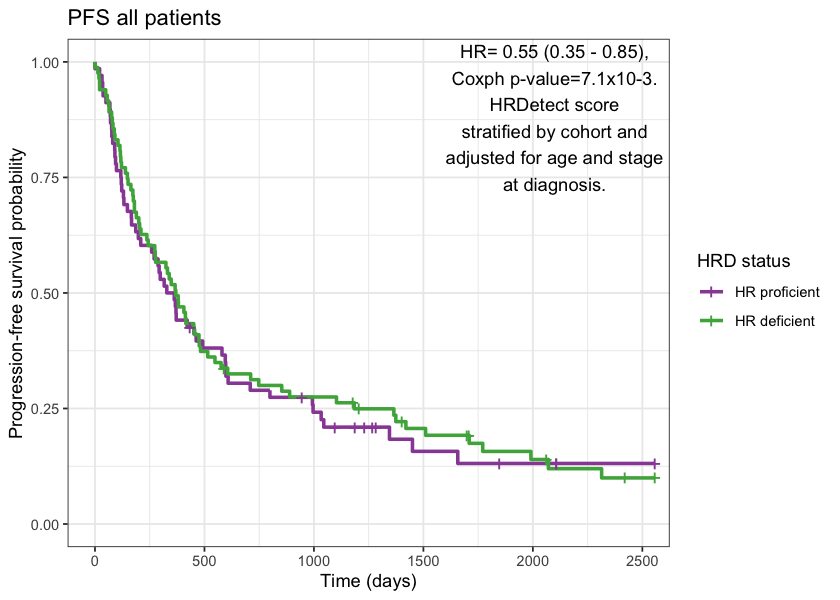

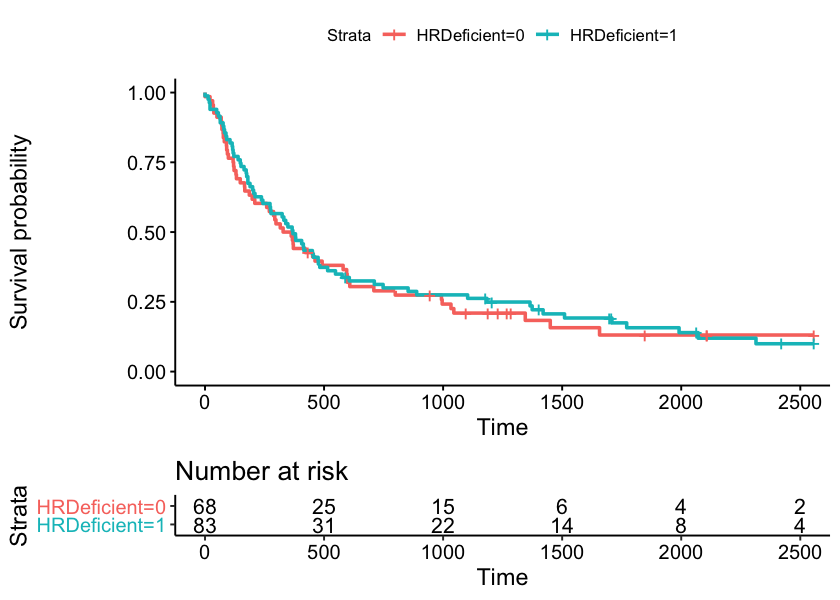

In [390]:
gg2<-ggsurvplot(fit_censored,data=censored,risk.table=T)

options(repr.plot.height=5,repr.plot.width=7)
#png("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Analysis/Clinical_associations/Clinical_analysis_wrt_HRD_PCAWG/Effect_of_HRDstatus_onpfssurvival_pcawg_edin_dundee_censored7yrs.png",width=7,height=5,res=300,unit="in")
gg2_km<-gg2$plot + theme_bw()+
annotate("text",x=2100,y=0.88,label="HR= 0.55 (0.35 - 0.85),\nCoxph p-value=7.1x10-3.\nHRDetect score\nstratified by cohort and\nadjusted for age and stage\nat diagnosis.")+
xlab("Time (days)")+
scale_colour_manual(name="HRD status",values=c("#984EA3","#4DAF4A"),
                                        labels=c("HR proficient","HR deficient"))+
ylab("Progression-free survival probability")+ggtitle("PFS all patients")
gg2_km
#dev.off()

gg2

### Survival differences between cohorts

In [357]:
mod2<-coxph(Surv(clinical_withdat_sampleinfo$donor_survival_time,clinical_withdat_sampleinfo$os_event)~as.factor(clinical_withdat_sampleinfo$cohort))

In [358]:
summary(mod2)

Call:
coxph(formula = Surv(clinical_withdat_sampleinfo$donor_survival_time, 
    clinical_withdat_sampleinfo$os_event) ~ as.factor(clinical_withdat_sampleinfo$cohort))

  n= 190, number of events= 144 
   (15 observations deleted due to missingness)

                                                       coef exp(coef) se(coef)
as.factor(clinical_withdat_sampleinfo$cohort)AOCS   -0.2019    0.8172   0.2222
as.factor(clinical_withdat_sampleinfo$cohort)SHGSOC -0.7278    0.4829   0.2332
                                                         z Pr(>|z|)   
as.factor(clinical_withdat_sampleinfo$cohort)AOCS   -0.909   0.3636   
as.factor(clinical_withdat_sampleinfo$cohort)SHGSOC -3.121   0.0018 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                                                    exp(coef) exp(-coef)
as.factor(clinical_withdat_sampleinfo$cohort)AOCS      0.8172      1.224
as.factor(clinical_withdat_sampleinfo$cohort)SHGSOC    0.4829      2.071
            

In [359]:
clinical_withdat_sampleinfo$cohort<-relevel(as.factor(clinical_withdat_sampleinfo$cohort),ref="TCGA")

In [360]:
fit2<- survfit(Surv(donor_survival_time,os_event) ~ cohort,data=clinical_withdat_sampleinfo)

In [361]:
options(repr.plot.height=5,repr.plot.width=7)
gg2<-ggsurvplot(fit2,data=clinical_withdat_sampleinfo)

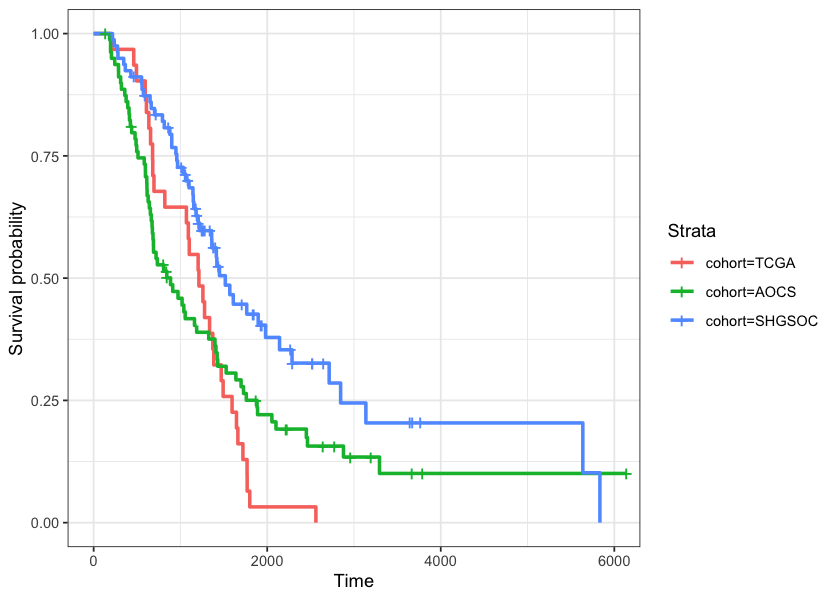

In [362]:
options(repr.plot.height=5,repr.plot.width=7)
#png("~/Desktop/Effect_of_Cohort_onsurvival_pcawg.png",width=7,height=5,res=300,unit="in")
gg2$plot + theme_bw()
#annotate("text",x=2500,y=0.98,label="HR= 0.37 (0.22 - 0.62),\nCoxph p-value=1.6x10-04.")+
#xlab("Time (days)")+scale_colour_manual(name="Cohort",values=c("#984EA3","#4DAF4A"),labels=c("AOCS","TCGA"))
#dev.off()


In [363]:
mod2<-coxph(Surv(clinical_withdat_sampleinfo$donor_relapse_interval,clinical_withdat_sampleinfo$pfs_event)~as.factor(clinical_withdat_sampleinfo$cohort))

In [364]:
summary(mod2)

Call:
coxph(formula = Surv(clinical_withdat_sampleinfo$donor_relapse_interval, 
    clinical_withdat_sampleinfo$pfs_event) ~ as.factor(clinical_withdat_sampleinfo$cohort))

  n= 151, number of events= 129 
   (54 observations deleted due to missingness)

                                                      coef exp(coef) se(coef)
as.factor(clinical_withdat_sampleinfo$cohort)AOCS   0.9092    2.4824   0.1814
as.factor(clinical_withdat_sampleinfo$cohort)SHGSOC     NA        NA   0.0000
                                                        z Pr(>|z|)    
as.factor(clinical_withdat_sampleinfo$cohort)AOCS   5.012 5.39e-07 ***
as.factor(clinical_withdat_sampleinfo$cohort)SHGSOC    NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                                                    exp(coef) exp(-coef)
as.factor(clinical_withdat_sampleinfo$cohort)AOCS       2.482     0.4028
as.factor(clinical_withdat_sampleinfo$cohort)SHGSOC        NA         NA
           

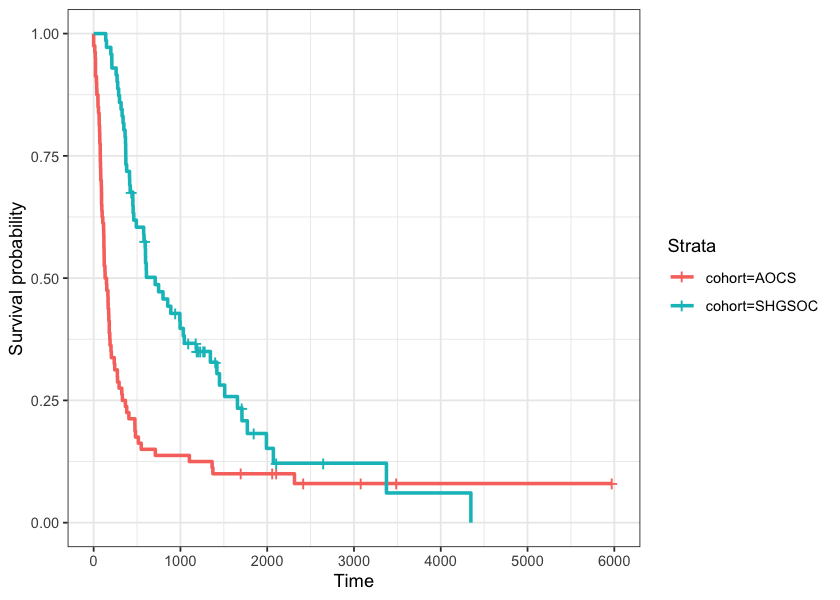

In [365]:
fit2<- survfit(Surv(donor_relapse_interval,pfs_event) ~ cohort,data=clinical_withdat_sampleinfo)
gg2<-ggsurvplot(fit2,data=clinical_withdat_sampleinfo)
gg2$plot + theme_bw()

## Filter survival analysis to exclude patients with BRCA1/2 short variants

In [366]:
dim(clinical_withdat_sampleinfo)
clinical_withdat_sampleinfo_nobrca<-clinical_withdat_sampleinfo[clinical_withdat_sampleinfo$BRCAstatus!="Germline SNV" &
                                                               clinical_withdat_sampleinfo$BRCAstatus!="Somatic SNV",]

dim(clinical_withdat_sampleinfo_nobrca)

[1] 205  45

[1] 155  45

In [369]:
mod<-coxph(Surv(clinical_withdat_sampleinfo_nobrca$donor_survival_time,
                clinical_withdat_sampleinfo_nobrca$os_event)~clinical_withdat_sampleinfo_nobrca$HRDetect+
           strata(as.factor(clinical_withdat_sampleinfo_nobrca$Cohort)))

mod2<-coxph(Surv(clinical_withdat_sampleinfo_nobrca$donor_survival_time,
                 clinical_withdat_sampleinfo_nobrca$os_event)~as.factor(clinical_withdat_sampleinfo_nobrca$HRDeficient)+
            strata(as.factor(clinical_withdat_sampleinfo_nobrca$Cohort)))

mod_age<-coxph(Surv(clinical_withdat_sampleinfo_nobrca$donor_survival_time,
                    clinical_withdat_sampleinfo_nobrca$os_event)~clinical_withdat_sampleinfo_nobrca$HRDetect+
               clinical_withdat_sampleinfo_nobrca$donor_age_at_diagnosis+
               strata(as.factor(clinical_withdat_sampleinfo_nobrca$Cohort)))

mod_age_stage<-coxph(Surv(clinical_withdat_sampleinfo_nobrca$donor_survival_time,
                          clinical_withdat_sampleinfo_nobrca$os_event)~clinical_withdat_sampleinfo_nobrca$HRDetect+
                     clinical_withdat_sampleinfo_nobrca$donor_age_at_diagnosis+
                     clinical_withdat_sampleinfo_nobrca$stage+
                     strata(as.factor(clinical_withdat_sampleinfo_nobrca$Cohort)))

In [370]:
mod
summary(mod_age_stage)
test.ph<-cox.zph(mod_age_stage)
#test.ph
#ggcoxzph(test.ph)
#ggcoxdiagnostics(mod_age_stage, type = "deviance", linear.predictions = TRUE)

Call:
coxph(formula = Surv(clinical_withdat_sampleinfo_nobrca$donor_survival_time, 
    clinical_withdat_sampleinfo_nobrca$os_event) ~ clinical_withdat_sampleinfo_nobrca$HRDetect + 
    strata(as.factor(clinical_withdat_sampleinfo_nobrca$Cohort)))

                                               coef exp(coef) se(coef)      z
clinical_withdat_sampleinfo_nobrca$HRDetect -0.8522    0.4265   0.2389 -3.567
                                                   p
clinical_withdat_sampleinfo_nobrca$HRDetect 0.000361

Likelihood ratio test=13.17  on 1 df, p=0.0002849
n= 146, number of events= 113 
   (9 observations deleted due to missingness)

Call:
coxph(formula = Surv(clinical_withdat_sampleinfo_nobrca$donor_survival_time, 
    clinical_withdat_sampleinfo_nobrca$os_event) ~ clinical_withdat_sampleinfo_nobrca$HRDetect + 
    clinical_withdat_sampleinfo_nobrca$donor_age_at_diagnosis + 
    clinical_withdat_sampleinfo_nobrca$stage + strata(as.factor(clinical_withdat_sampleinfo_nobrca$Cohort)))

  n= 145, number of events= 113 
   (10 observations deleted due to missingness)

                                                              coef exp(coef)
clinical_withdat_sampleinfo_nobrca$HRDetect               -0.77662   0.45996
clinical_withdat_sampleinfo_nobrca$donor_age_at_diagnosis  0.03080   1.03128
clinical_withdat_sampleinfo_nobrca$stage                   0.63456   1.88620
                                                          se(coef)      z
clinical_withdat_sampleinfo_nobrca$HRDetect                0.24525 -3.167
clinical_withdat_sampleinfo_nobrca$donor_age_at_diagnosis  0.01041  2.959
clinical_withdat_sampleinfo_nob

In [371]:
censored<-clinical_withdat_sampleinfo_nobrca
censored$event<-censored$os_event
censored$surv_time<-censored$donor_survival_time
censored[which(censored$donor_survival_time>2557),"event"]<-0
censored[which(censored$donor_survival_time>2557),"surv_time"]<-2557
fit_censored <- survfit(Surv(surv_time,event) ~ HRDeficient,data=censored)

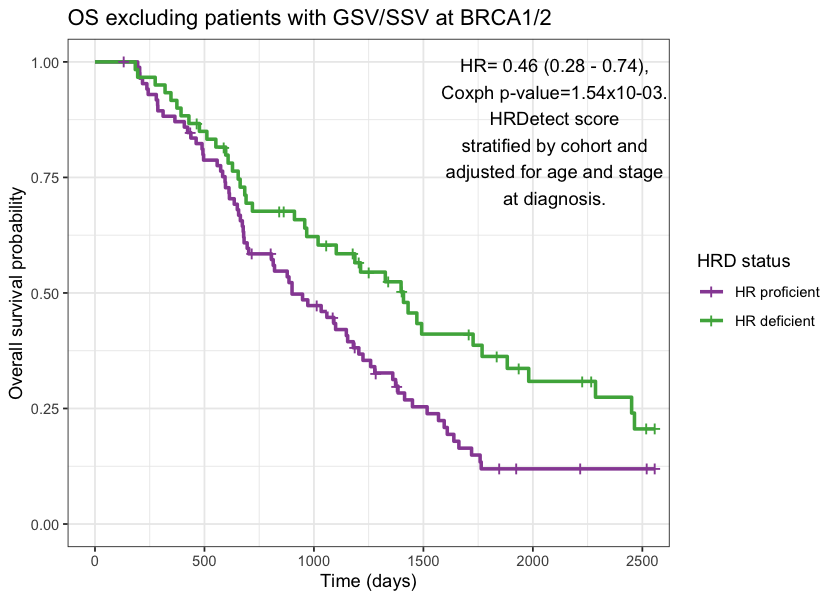

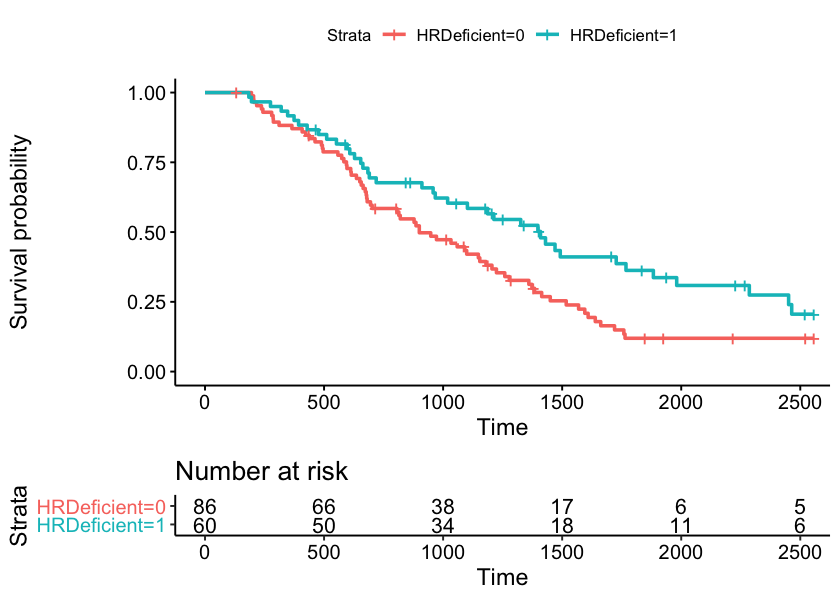

In [372]:
options(repr.plot.height=5,repr.plot.width=7)
gg3<-ggsurvplot(fit_censored,data=censored,risk.table=T)

options(repr.plot.height=5,repr.plot.width=7)
#png("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Analysis/Clinical_associations/Clinical_analysis_wrt_HRD_PCAWG/Effect_of_HRDstatus_onsurvival_pcawg_censored7yrs.png",width=7,height=5,res=300,unit="in")
gg3_km<-gg3$plot + theme_bw()+
annotate("text",x=2100,y=0.85,label="HR= 0.46 (0.28 - 0.74),\nCoxph p-value=1.54x10-03.\nHRDetect score\nstratified by cohort and\nadjusted for age and stage\nat diagnosis.")+
xlab("Time (days)")+scale_colour_manual(name="HRD status",values=c("#984EA3","#4DAF4A"),
                                        labels=c("HR proficient","HR deficient"))+
ylab("Overall survival probability")+ggtitle("OS excluding patients with GSV/SSV at BRCA1/2")
gg3_km
#dev.off()
print(gg3,surv.plot.height=0)

### Progression-free no BRCA SNVs

In [373]:
mod<-coxph(Surv(clinical_withdat_sampleinfo_nobrca$donor_relapse_interval,
                clinical_withdat_sampleinfo_nobrca$pfs_event)~clinical_withdat_sampleinfo_nobrca$HRDetect+
           strata(as.factor(clinical_withdat_sampleinfo_nobrca$cohort)))

mod2<-coxph(Surv(clinical_withdat_sampleinfo_nobrca$donor_relapse_interval,
                 clinical_withdat_sampleinfo_nobrca$pfs_event)~as.factor(clinical_withdat_sampleinfo_nobrca$HRDeficient)+
            strata(as.factor(clinical_withdat_sampleinfo_nobrca$cohort)))

mod_age<-coxph(Surv(clinical_withdat_sampleinfo_nobrca$donor_relapse_interval,
                    clinical_withdat_sampleinfo_nobrca$pfs_event)~clinical_withdat_sampleinfo_nobrca$HRDetect+
               clinical_withdat_sampleinfo_nobrca$donor_age_at_diagnosis+
               strata(as.factor(clinical_withdat_sampleinfo_nobrca$cohort)))

mod_age_stage<-coxph(Surv(clinical_withdat_sampleinfo_nobrca$donor_relapse_interval,
                          clinical_withdat_sampleinfo_nobrca$pfs_event)~clinical_withdat_sampleinfo_nobrca$HRDetect+
                     clinical_withdat_sampleinfo_nobrca$donor_age_at_diagnosis+
                     clinical_withdat_sampleinfo_nobrca$stage+
                     strata(as.factor(clinical_withdat_sampleinfo_nobrca$cohort)))

In [374]:
summary(mod_age_stage)

Call:
coxph(formula = Surv(clinical_withdat_sampleinfo_nobrca$donor_relapse_interval, 
    clinical_withdat_sampleinfo_nobrca$pfs_event) ~ clinical_withdat_sampleinfo_nobrca$HRDetect + 
    clinical_withdat_sampleinfo_nobrca$donor_age_at_diagnosis + 
    clinical_withdat_sampleinfo_nobrca$stage + strata(as.factor(clinical_withdat_sampleinfo_nobrca$cohort)))

  n= 115, number of events= 100 
   (40 observations deleted due to missingness)

                                                              coef exp(coef)
clinical_withdat_sampleinfo_nobrca$HRDetect               -0.53757   0.58417
clinical_withdat_sampleinfo_nobrca$donor_age_at_diagnosis  0.01001   1.01006
clinical_withdat_sampleinfo_nobrca$stage                   0.50408   1.65547
                                                          se(coef)      z
clinical_withdat_sampleinfo_nobrca$HRDetect                0.24669 -2.179
clinical_withdat_sampleinfo_nobrca$donor_age_at_diagnosis  0.01021  0.980
clinical_withdat_sampleinfo

In [375]:
censored<-clinical_withdat_sampleinfo_nobrca
censored$event<-censored$pfs_event
censored$surv_time<-censored$donor_relapse_interval
censored[which(censored$donor_relapse_interval>2557),"event"]<-0
censored[which(censored$donor_relapse_interval>2557),"surv_time"]<-2557
fit_censored <- survfit(Surv(surv_time,event) ~ HRDeficient,data=censored)

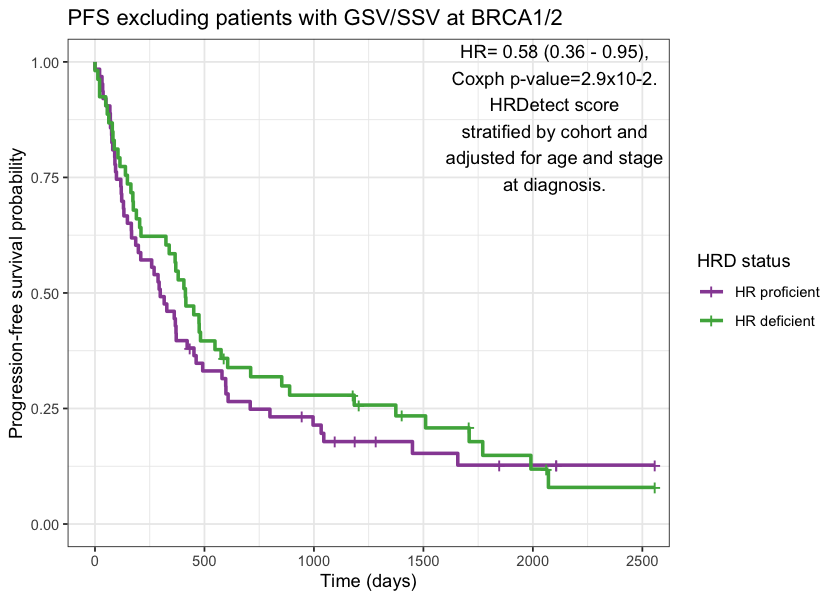

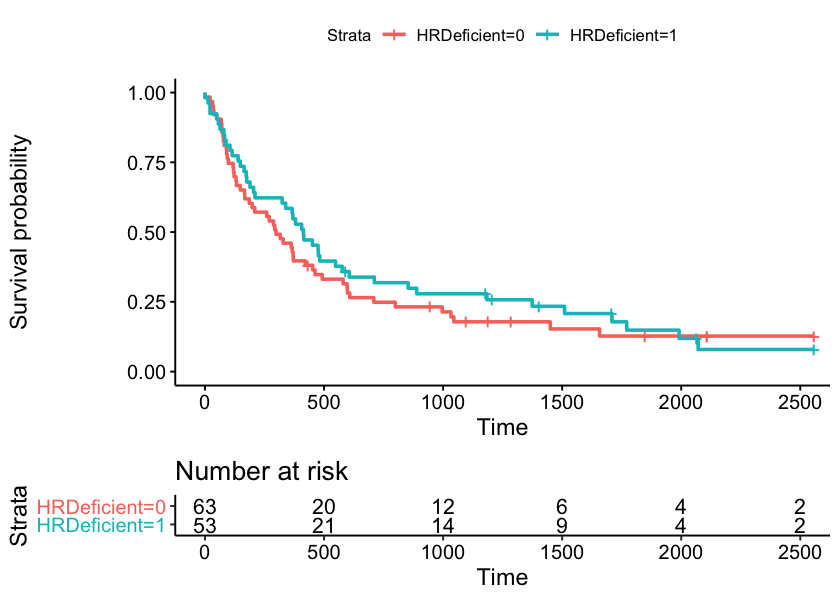

In [376]:
gg4<-ggsurvplot(fit_censored,data=censored,risk.table=T)

options(repr.plot.height=5,repr.plot.width=7)
#png("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Analysis/Clinical_associations/Clinical_analysis_wrt_HRD_PCAWG/Effect_of_HRDstatus_onpfssurvival_pcawg_edin_dundee_censored7yrs.png",width=7,height=5,res=300,unit="in")
gg4_km<-gg4$plot + theme_bw()+
annotate("text",x=2100,y=0.88,label="HR= 0.58 (0.36 - 0.95),\nCoxph p-value=2.9x10-2.\nHRDetect score\nstratified by cohort and\nadjusted for age and stage\nat diagnosis.")+
xlab("Time (days)")+
scale_colour_manual(name="HRD status",values=c("#984EA3","#4DAF4A"),
                                        labels=c("HR proficient","HR deficient"))+
ylab("Progression-free survival probability")+ggtitle("PFS excluding patients with GSV/SSV at BRCA1/2")
gg4_km
#dev.off()

gg4

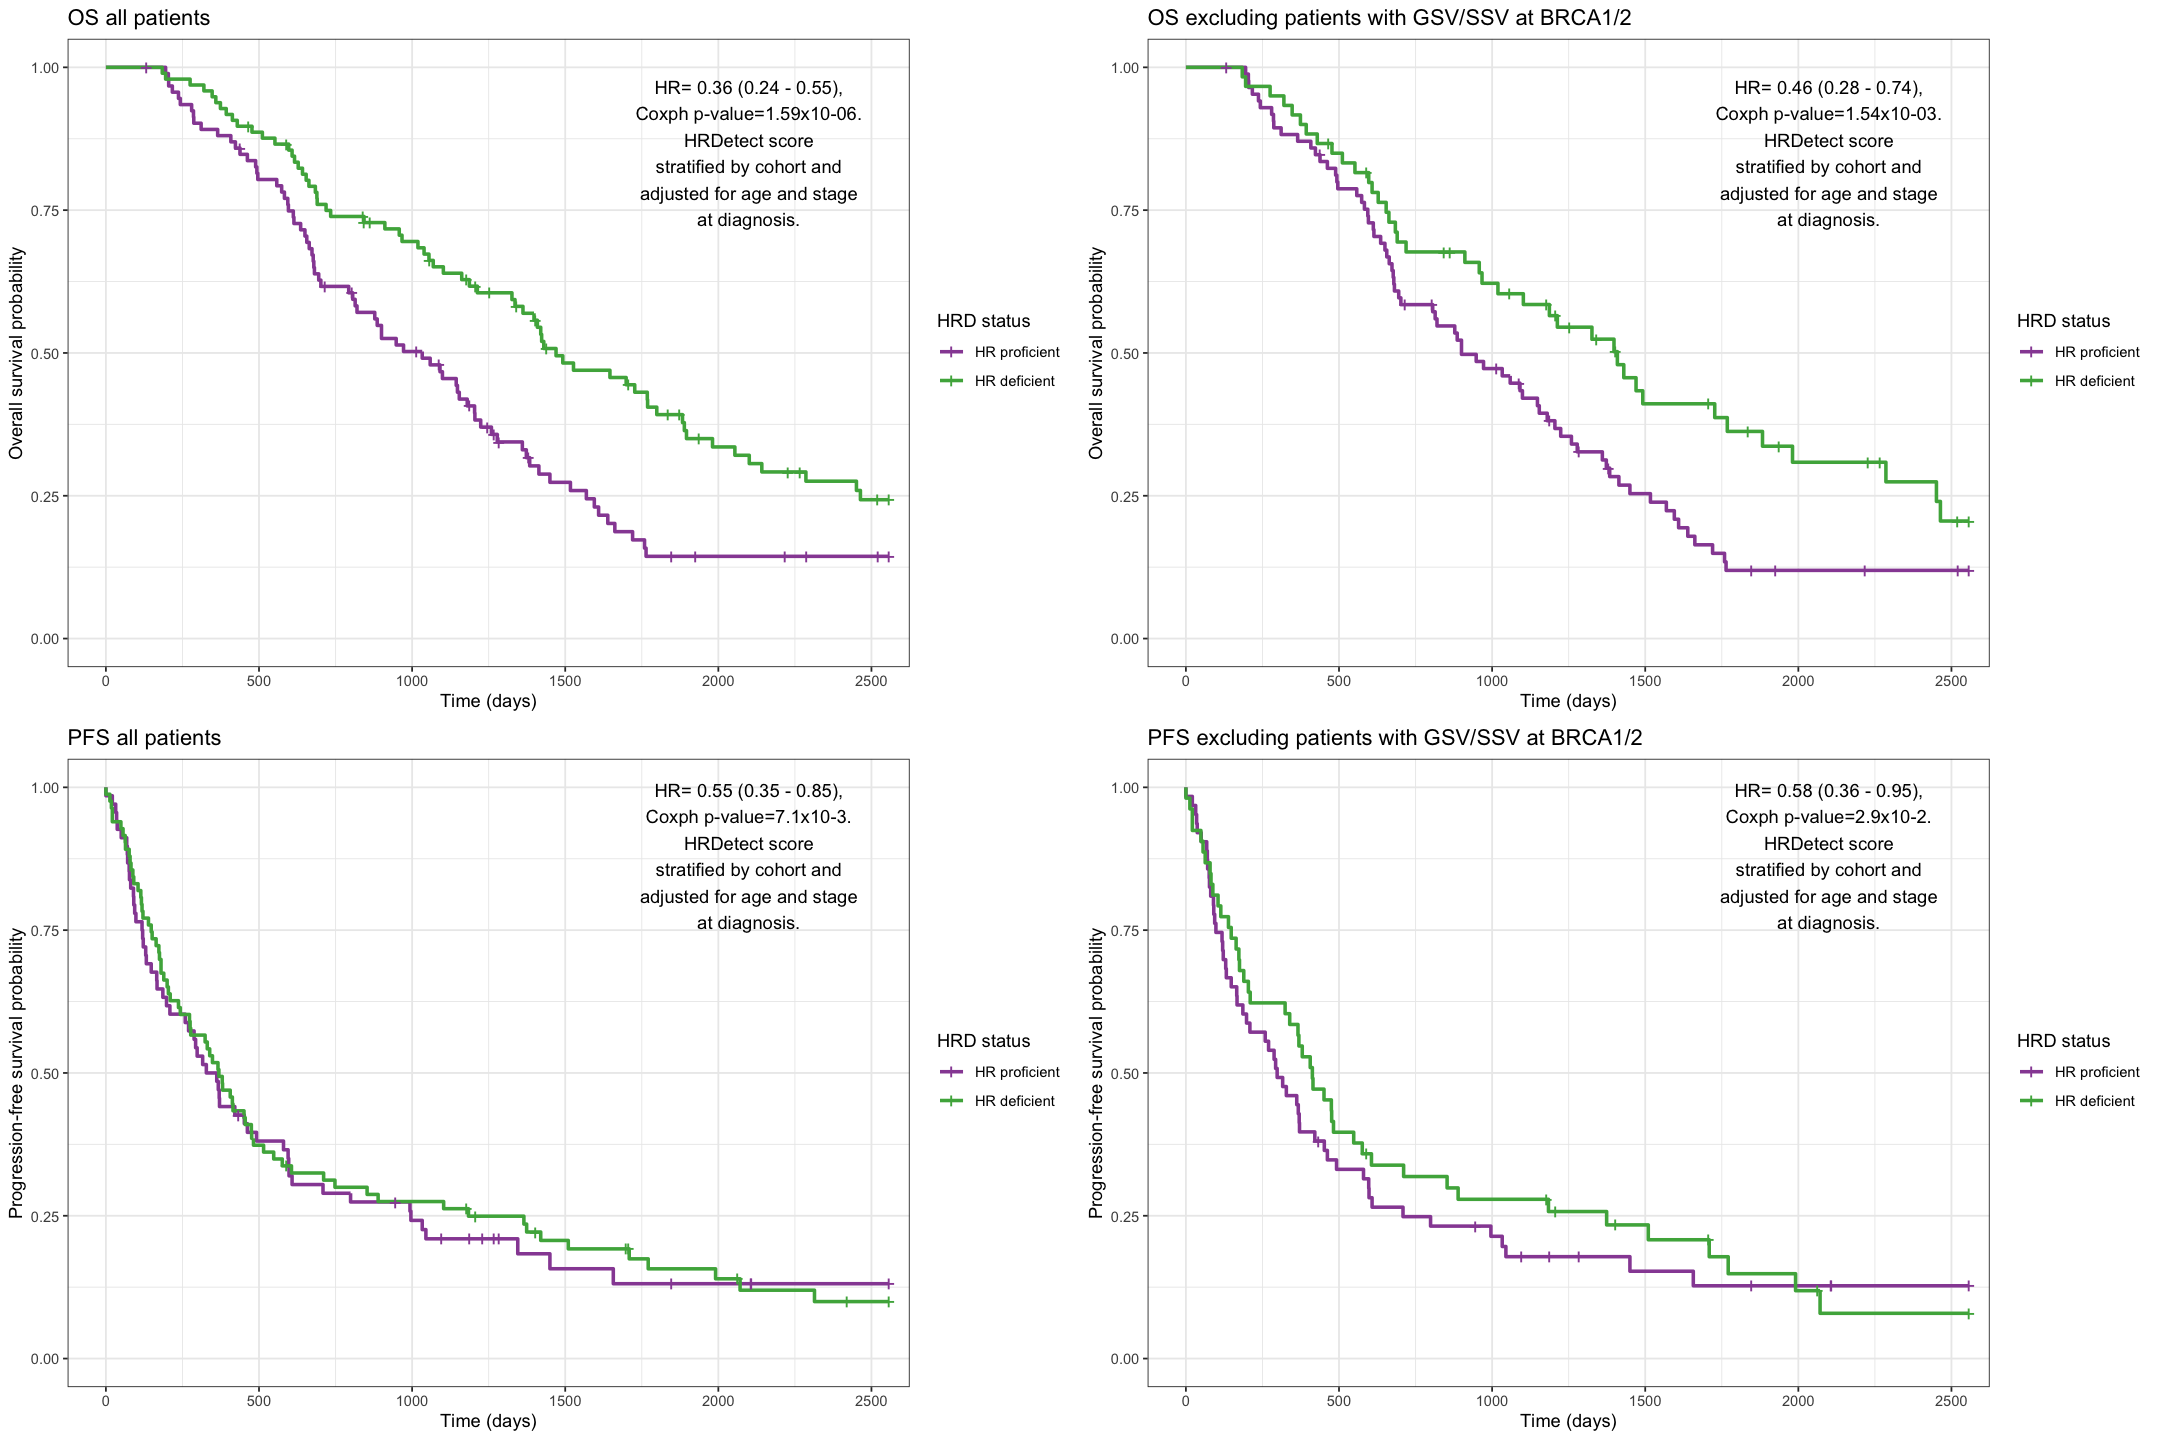

In [396]:
library(gridExtra)
options(repr.plot.width=18
        ,repr.plot.height=12)
#png("~/Desktop/BRCA1_BRCA2_SVs_paper/Manuscript/Intermediate_figures/OS_PFS_survival_figures.png",width=18,height=12,unit="in",res=300)
grid.arrange(gg1_km,gg3_km,gg2_km,gg4_km)
#dev.off()